# BYU CS 180 Lab 6

## Introduction:
In this lab, we will analyze college football data from the years 2016-2020. The data is spread across multiple files and will require a bit of “data wrangling”.

Once we have cleaned and processed the data, we will put our statistics knowledge to good use by digging a little deeper than simple summary statistics.

Very rarely are data scientists handed a pristine data set ready for analysis. More often than not, quite a bit of work is required to clean and preprocess the data so that it's ready for analysis.

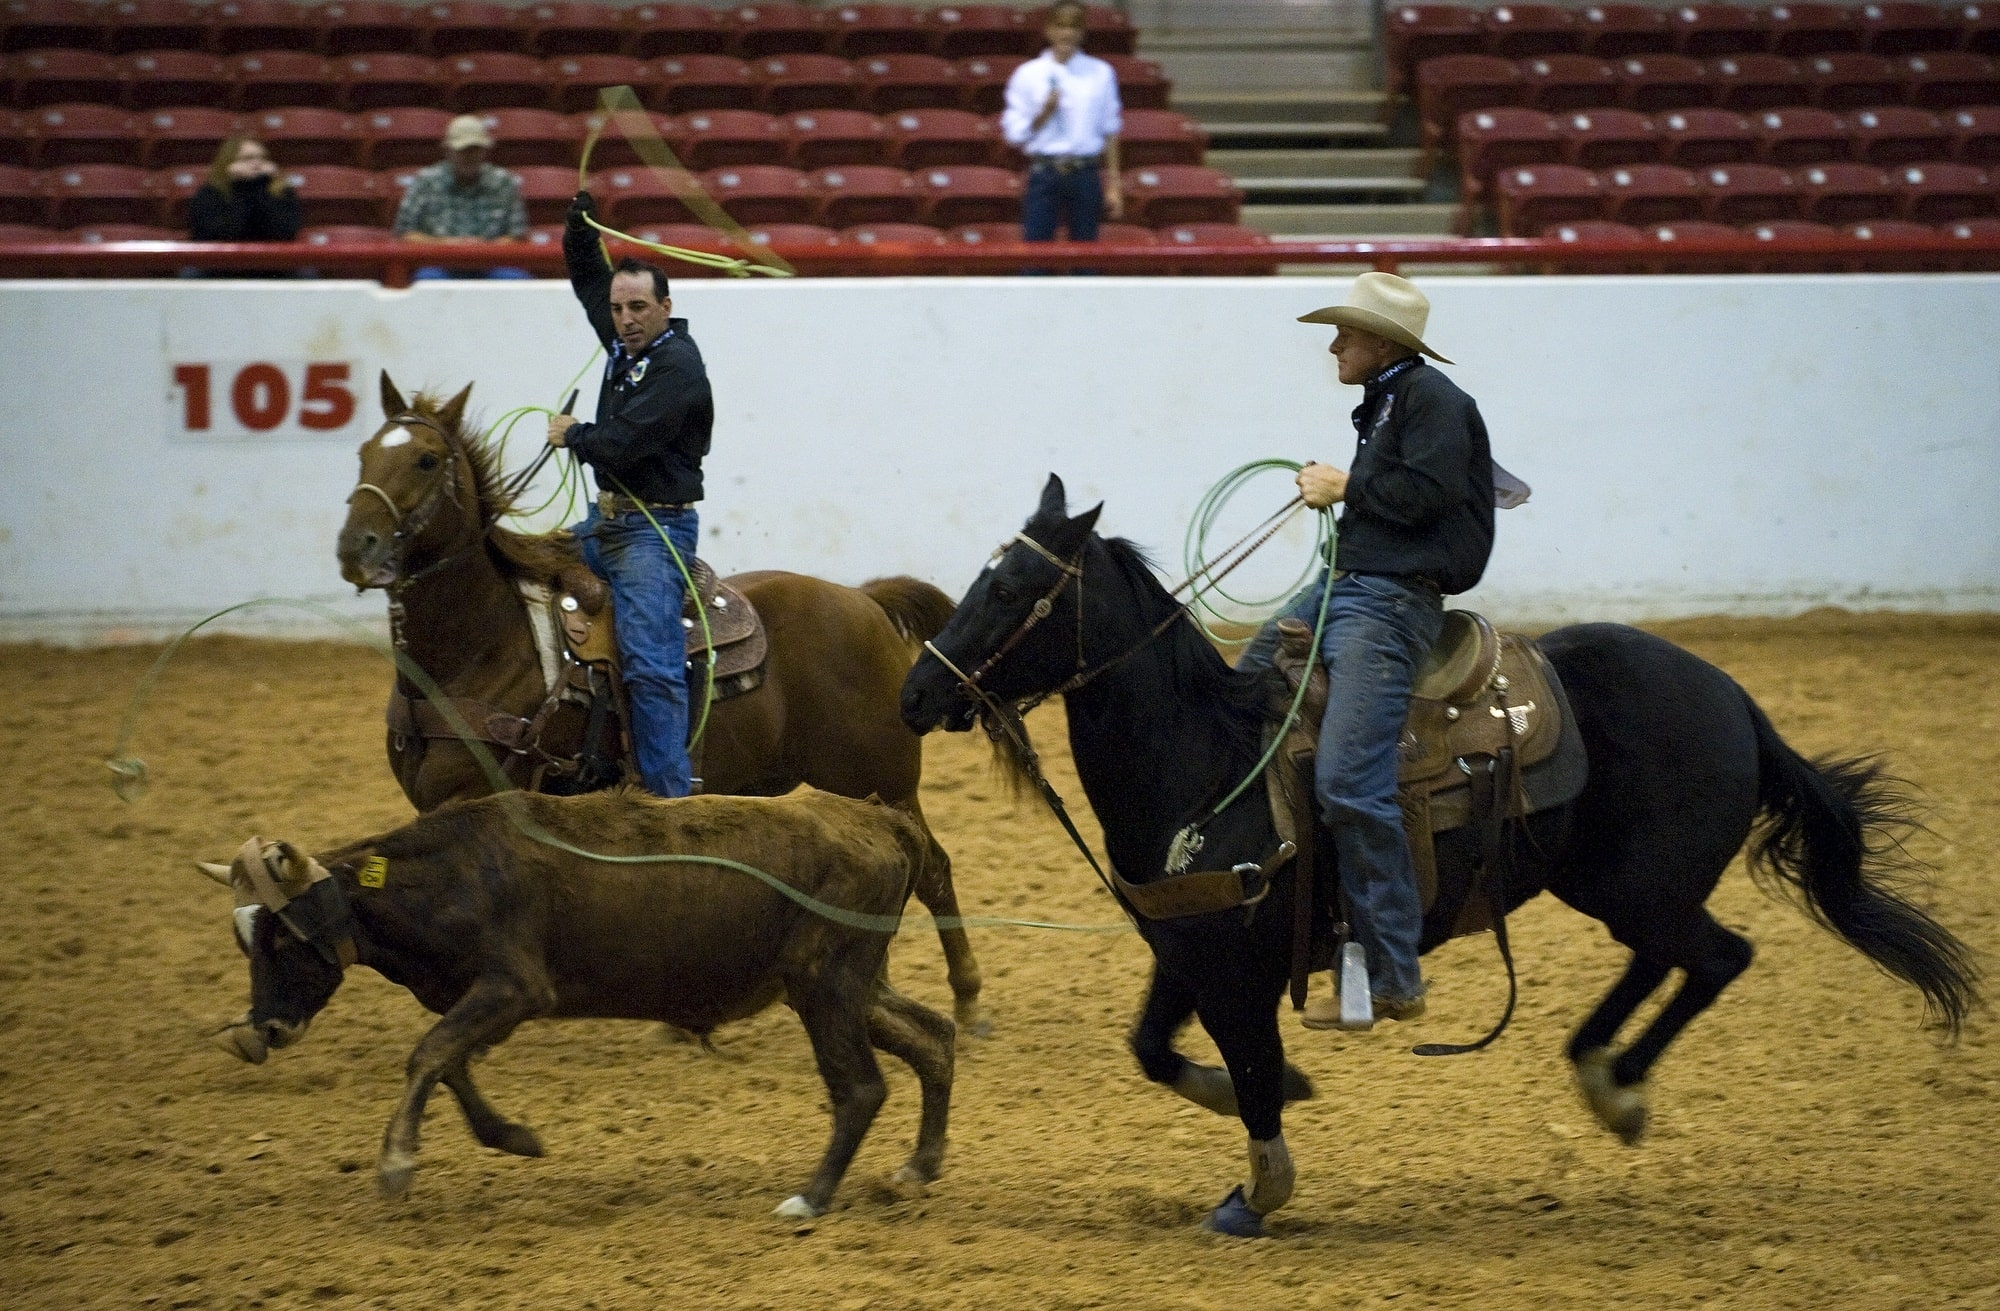

**Data wrangling**, also called **data cleaning**, **data remediation**, or **data munging**, refers to a variety of processes designed to transform raw data into more readily usable formats. The exact methods differ from project to project depending on the data you’re leveraging and the goal you’re trying to achieve.

Some examples of data wrangling include:

- Merging multiple data sources into a single dataset for analysis.

- Identifying gaps in data (for example, empty cells in a spreadsheet) and either filling or deleting them.

- Deleting data that’s either unnecessary or irrelevant to the project you’re working on.

- Identifying extreme outliers in data and either explaining the discrepancies or removing them.

#### Measures of Variability
We are very used to comparing point estimates. For example, in order to tell if one thing is better than the other, we may look at the average of each over time. Consider the following plot comparing the average of two groups, mu_0 and mu_1.

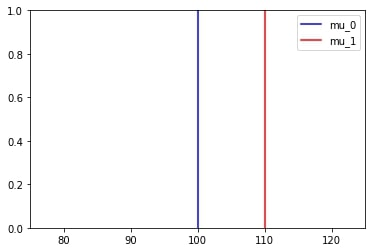

In this case, we might conclude that mu_1 is greater because it’s average is higher. However, we are ignoring an important aspect of the data: its variability.

When we plot the **variability and the mean**, we observe the following plot:

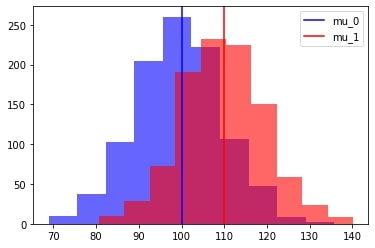

Now the distributions of mu_1 and mu_0 are so close that it’s difficult to say with certainty that mu_1 is better. For any random draw of mu_1, it’s roughly a 50-50 chance to actually be greater than a random draw of mu_0.

Now suppose we observe the following plot:

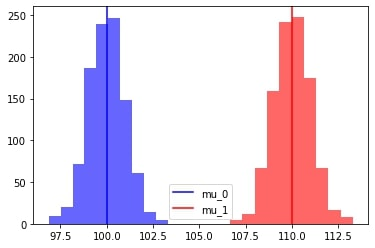

While the means are the same as before, the variability of the two distributions are now very different. We can say with a high degree of certainty that mu_1 is higher.

Keep this idea in mind as you analyze the dataset for this lab.

### **Data:**
Data from the 2016, 2017, 2018, 2019, and 2020 college football seasons are also available on the course GitHub:

In [ ]:
# Download the data by running this cell
!wget https://raw.githubusercontent.com/porterjenkins/cs180-intro-data-science/master/data/cfb16.csv
!wget https://raw.githubusercontent.com/porterjenkins/cs180-intro-data-science/master/data/cfb17.csv
!wget https://raw.githubusercontent.com/porterjenkins/cs180-intro-data-science/master/data/cfb18.csv
!wget https://raw.githubusercontent.com/porterjenkins/cs180-intro-data-science/master/data/cfb19.csv
!wget https://raw.githubusercontent.com/porterjenkins/cs180-intro-data-science/master/data/cfb20.csv

--2023-10-12 20:16:30--  https://raw.githubusercontent.com/porterjenkins/cs180-intro-data-science/master/data/cfb16.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 71618 (70K) [text/plain]
Saving to: ‘cfb16.csv’

cfb16.csv           100%[===================>]  69.94K  --.-KB/s    in 0.01s   

2023-10-12 20:16:30 (5.01 MB/s) - ‘cfb16.csv’ saved [71618/71618]

--2023-10-12 20:16:31--  https://raw.githubusercontent.com/porterjenkins/cs180-intro-data-science/master/data/cfb17.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 791

## Exercise 1: Yearly Counts

### Exercise Question
Read in the files, and add a year column to each file (from the original .csv file name).

In [ ]:
# Write your code to read in the files and add the year values from each csv:
import pandas as pd

df_16 = pd.read_csv('cfb16.csv')
df_17 = pd.read_csv('cfb17.csv')
df_18 = pd.read_csv('cfb18.csv')
df_19 = pd.read_csv('cfb19.csv')
df_20 = pd.read_csv('cfb20.csv')

constant_number =  2016
df_16['Year'] = pd.Series([constant_number] * len(df_16))
df_17['Year'] = pd.Series([constant_number+1] * len(df_17))
df_18['Year'] = pd.Series([constant_number+2] * len(df_18))
df_19['Year'] = pd.Series([constant_number+3] * len(df_19))
df_20['Year'] = pd.Series([constant_number+4] * len(df_20))
print(df_16)
print(df_17)
print(df_18)
print(df_19)
print(df_20)

                           Team  Games  Win  Loss  Off.Rank  Off.Plays  \
0                   Akron (MAC)     12    5     7        84        776   
1                 Alabama (SEC)     15   14     1        34       1056   
2    Appalachian St. (Sun Belt)     13   10     3        52        912   
3              Arizona (Pac-12)     12    3     9        67        815   
4          Arizona St. (Pac-12)     12    5     7        81        900   
..                          ...    ...  ...   ...       ...        ...   
111     Washington St. (Pac-12)     13    8     5        18       1026   
112      West Virginia (Big 12)     13   10     3        17        983   
113         Western Ky. (C-USA)     14   11     3         5        958   
114         Western Mich. (MAC)     14   13     1        19       1012   
115         Wisconsin (Big Ten)     14   11     3        89        981   

     Off.Yards  Off.Yards.Play  Off.TDs  Off.Yards.per.Game  ...  \
0         4649            5.99       38    

## Exercise 2: Data Aggregation

### Exercise Question
Combine every file into a single dataframe.

In [ ]:
# Write your code to combine all of the csvs into one dataframe here:
df_merged = pd.concat([df_16, df_17,df_18,df_19,df_20])
print(df_merged)

                           Team  Games  Win  Loss  Off.Rank  Off.Plays  \
0                   Akron (MAC)     12    5     7        84        776   
1                 Alabama (SEC)     15   14     1        34       1056   
2    Appalachian St. (Sun Belt)     13   10     3        52        912   
3              Arizona (Pac-12)     12    3     9        67        815   
4          Arizona St. (Pac-12)     12    5     7        81        900   
..                          ...    ...  ...   ...       ...        ...   
122      West Virginia (Big 12)      9    5     4        42        690   
123         Western Ky. (C-USA)     11    5     6       120        699   
124         Western Mich. (MAC)      6    4     2        15        392   
125         Wisconsin (Big Ten)      6    3     3        93        431   
126     Wyoming (Mountain West)      6    2     4        82        409   

     Off.Yards  Off.Yards.Play  Off.TDs  Off.Yards.per.Game  ...  \
0         4649            5.99       38    

## Exercise 3: Conference Search

### Exercise Question
Create a `conference` field by parsing the `team` column.



Example:

| Team | Conference |
| --- | --- |
| Penn State University (Big Ten) | Big Ten |

In [ ]:
# Write your code to parse the conference from the team name:
df_merged['Conference'] = df_merged['Team'].str.split('(', expand=True)[1].str.replace(')', '')
print(df_merged['Conference'])

0                MAC
1                SEC
2           Sun Belt
3             Pac-12
4             Pac-12
           ...      
122           Big 12
123            C-USA
124              MAC
125          Big Ten
126    Mountain West
Name: Conference, Length: 631, dtype: object


<ipython-input-4-73dac370eca3>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_merged['Conference'] = df_merged['Team'].str.split('(', expand=True)[1].str.replace(')', '')


In [ ]:
df = df_merged

## Exercise 4: Big Ten Vs. South Eastern

### Exercise Question 4a: Offense
- Is there a statistical difference between the Big Ten Conference and the South Eastern Conference in terms of `Off.Yards.per.Game`? Use a [seaborn KDE]("https://seaborn.pydata.org/generated/seaborn.kdeplot.html") plot to create a figure. Comment on the difference in means and the overlap of distributions.

- Do the same as above for `Off.TDs`.

385.5642857142857
412.7885714285715


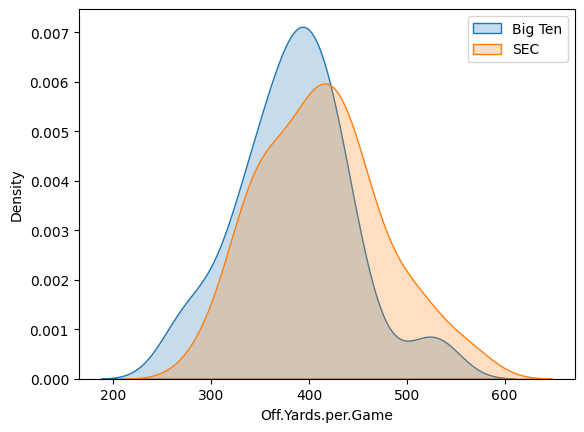

In [ ]:
# Write the code for the statistical differences for Off.Yards.per.Game:
import seaborn as sns
import matplotlib.pyplot as plt

big_ten = df[df['Conference'] == 'Big Ten']
sec = df[df['Conference'] == 'SEC']

sns.kdeplot(big_ten['Off.Yards.per.Game'], label='Big Ten', fill=True)
sns.kdeplot(sec['Off.Yards.per.Game'], label='SEC', fill=True)
plt.legend()
mean_big_ten = big_ten['Off.Yards.per.Game'].mean()
print(mean_big_ten)
mean_sec = sec['Off.Yards.per.Game'].mean()
print(mean_sec)

The overlap of the two teams is very similar and the mean for the SEC is only slightly larger than Big Ten by 27.2 yards.


38.642857142857146
43.77142857142857


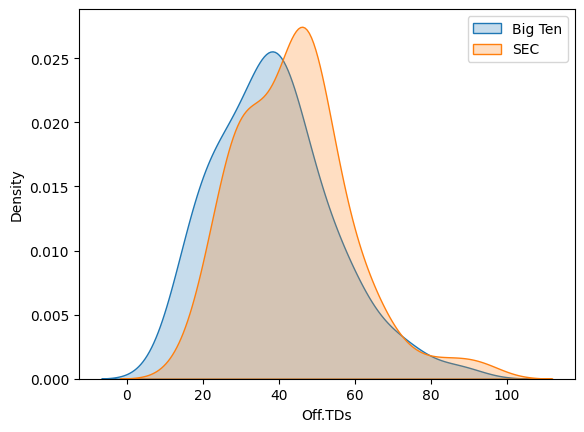

In [ ]:
# Write the code for the statistical differences for Off.TDs:
sns.kdeplot(big_ten['Off.TDs'], label='Big Ten', fill=True)
sns.kdeplot(sec['Off.TDs'], label='SEC', fill=True)
plt.legend()
mean_big_ten = big_ten['Off.TDs'].mean()
print(mean_big_ten)
mean_sec = sec['Off.TDs'].mean()
print(mean_sec)

The stroy is very simmilar here too where the spred for SEC is slightly greater than the Big Ten data but very similar between the two sets of data. The means are only sepperated by 5.12 touchdowns.

### Exercise Question 4b: Defense
- Is there a statistical difference between the Big Ten Conference and the South Eastern Conference in terms  of `Points.Allowed`? Use a  [seaborn KDE]("https://seaborn.pydata.org/generated/seaborn.kdeplot.html") plot to create a figure.  Comment on the difference in means and the overlap of distributions.

- Do the same as above for `Opp.Pass.Yds.Allowed` and `Opp.Rush.Yards.Alloweed`.



286.3285714285714
306.12857142857143


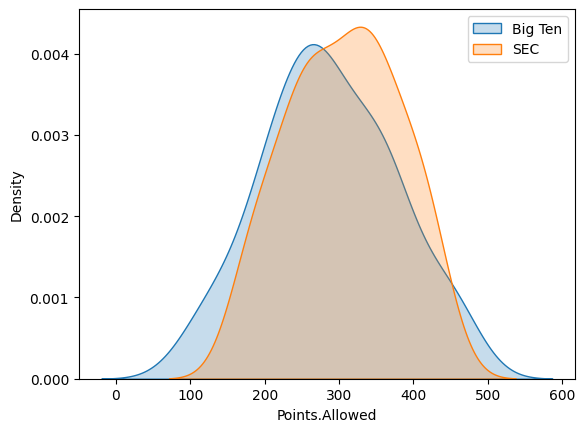

In [ ]:
# Write the code for the statistical differences for Points.Allowed:
sns.kdeplot(big_ten['Points.Allowed'], label='Big Ten', fill=True)
sns.kdeplot(sec['Points.Allowed'], label='SEC', fill=True)
plt.legend()

mean_big_ten = big_ten['Points.Allowed'].mean()
print(mean_big_ten)
mean_sec = sec['Points.Allowed'].mean()
print(mean_sec)

The spread here is different then before where the Big Ten has a larger spread than that of SEC. However, The mean of the Big Ten is still lower by about 20 points.

2454.8571428571427
2716.3


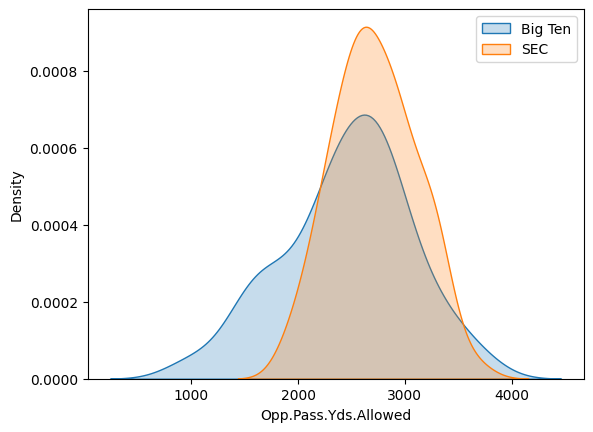

In [ ]:
# Write the code for the statistical differences for Opp.Pass.Yds.Allowed:
sns.kdeplot(big_ten['Opp.Pass.Yds.Allowed'], label='Big Ten', fill=True)
sns.kdeplot(sec['Opp.Pass.Yds.Allowed'], label='SEC', fill=True)
plt.legend()
mean_big_ten = big_ten['Opp.Pass.Yds.Allowed'].mean()
print(mean_big_ten)
mean_sec = sec['Opp.Pass.Yds.Allowed'].mean()
print(mean_sec)

The Big Ten spread is now much larger than the spread of the SEC with the possibility of being skewed left. The means for the data is sperated by 261.4 Yards allowed where SEC has the greater Mean.

In [ ]:
big_ten['Opp.Rush.Yards.Alloweed']

34     2630
35     2085
36     1947
48     2792
53     1550
       ... 
75      580
81     1172
83      869
85     1833
125     562
Name: Opp.Rush.Yards.Alloweed, Length: 70, dtype: int64

1794.057142857143
1920.9714285714285


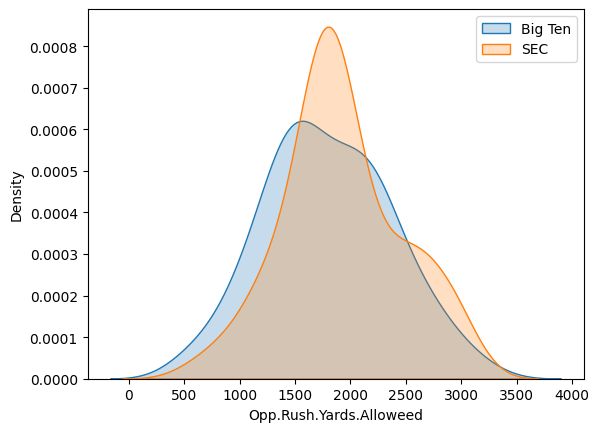

In [ ]:
# Write the code for the statistical differences for Opp.Rush.Yards.Alloweed:
sns.kdeplot(big_ten['Opp.Rush.Yards.Alloweed'], label='Big Ten', fill=True)
sns.kdeplot(sec['Opp.Rush.Yards.Alloweed'], label='SEC', fill=True)
plt.legend()
mean_big_ten = big_ten['Opp.Rush.Yards.Alloweed'].mean()
print(mean_big_ten)
mean_sec = sec['Opp.Rush.Yards.Alloweed'].mean()
print(mean_sec)

The spreds are very similar between the two sets of data. With a greater concentration for SEC around the mean of 1920 yards. The means are sepperated by about 127 yards.

## Exercise 5: Offense Statistics

### Exercise Question 5a: Offense
Is the offense changing over time? Create some plots showing the average offensive production over time (each year). Include an estimate of the variability in your figures.

Comment on whether any trends you see are likely to be true or spurious.

Create a plot for the following metrics:
- `Off.Yards.per.Game`
- `Off.TDs`

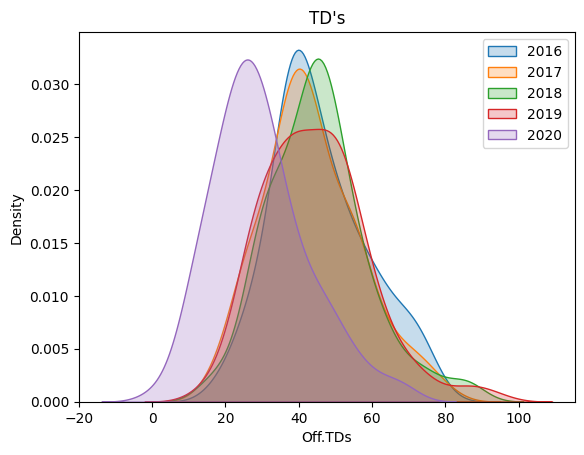

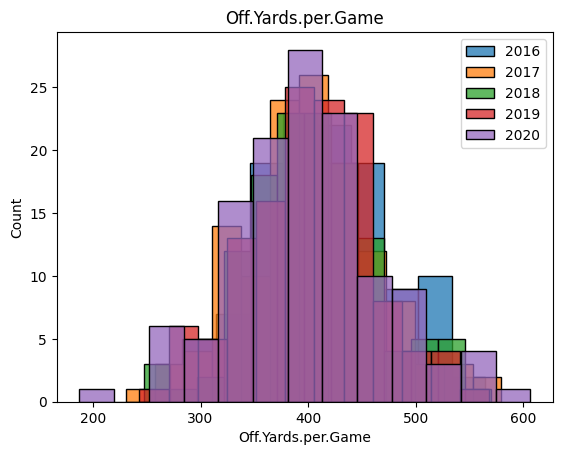

In [ ]:
# Create a few plots showing how each metric changed over time:
df_2016 = df[df['Year'] == 2016]
df_2017 = df[df['Year'] == 2017]
df_2018 = df[df['Year'] == 2018]
df_2019 = df[df['Year'] == 2019]
df_2020 = df[df['Year'] == 2020]

sns.kdeplot(df_2016['Off.TDs'], label='2016', fill=True)
sns.kdeplot(df_2017['Off.TDs'], label='2017', fill=True)
sns.kdeplot(df_2018['Off.TDs'], label='2018', fill=True)
sns.kdeplot(df_2019['Off.TDs'], label='2019', fill=True)
sns.kdeplot(df_2020['Off.TDs'], label='2020', fill=True)
plt.title("TD's")
plt.legend()
plt.show()


sns.histplot(df_2016['Off.Yards.per.Game'], label='2016', fill=True)
sns.histplot(df_2017['Off.Yards.per.Game'], label='2017', fill=True)
sns.histplot(df_2018['Off.Yards.per.Game'], label='2018', fill=True)
sns.histplot(df_2019['Off.Yards.per.Game'], label='2019', fill=True)
sns.histplot(df_2020['Off.Yards.per.Game'], label='2020', fill=True)
plt.title("Off.Yards.per.Game")
plt.legend()
plt.show()


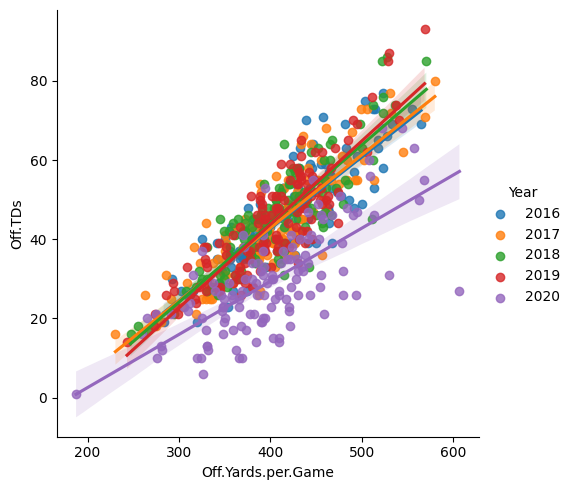

In [ ]:
sns.lmplot(
    data=df,
    x="Off.Yards.per.Game", y="Off.TDs", hue="Year",
    height=5)

In [ ]:
# # Create a few plots showing how each metric changed over time:
# big_ten_2016 = big_ten[big_ten['Year'] == 2016]
# big_ten_2017 = big_ten[big_ten['Year'] == 2017]
# big_ten_2018 = big_ten[big_ten['Year'] == 2018]
# big_ten_2019 = big_ten[big_ten['Year'] == 2019]
# big_ten_2020 = big_ten[big_ten['Year'] == 2020]

# sns.kdeplot(big_ten_2016['Off.TDs'], label='Big Ten 2016', fill=True)
# sns.kdeplot(big_ten_2017['Off.TDs'], label='Big Ten 2017', fill=True)
# sns.kdeplot(big_ten_2018['Off.TDs'], label='Big Ten 2018', fill=True)
# sns.kdeplot(big_ten_2019['Off.TDs'], label='Big Ten 2019', fill=True)
# sns.kdeplot(big_ten_2020['Off.TDs'], label='Big Ten 2020', fill=True)
# plt.title("TD's")
# plt.legend()
# plt.show()


# sns.kdeplot(big_ten_2016['Off.Yards.per.Game'], label='Big Ten 2016', fill=True)
# sns.kdeplot(big_ten_2017['Off.Yards.per.Game'], label='Big Ten 2017', fill=True)
# sns.kdeplot(big_ten_2018['Off.Yards.per.Game'], label='Big Ten 2018', fill=True)
# sns.kdeplot(big_ten_2019['Off.Yards.per.Game'], label='Big Ten 2019', fill=True)
# sns.kdeplot(big_ten_2020['Off.Yards.per.Game'], label='Big Ten 2020', fill=True)
# plt.title("Off.Rank")
# plt.legend()
# plt.show()


In [ ]:
# # Create a few plots showing how each metric changed over time:
# sec_2016 = sec[sec['Year'] == 2016]
# sec_2017 = sec[sec['Year'] == 2017]
# sec_2018 = sec[sec['Year'] == 2018]
# sec_2019 = sec[sec['Year'] == 2019]
# sec_2020 = sec[sec['Year'] == 2020]

# sns.kdeplot(sec_2016['Off.TDs'], label='sec 2016', fill=True)
# sns.kdeplot(sec_2017['Off.TDs'], label='sec 2017', fill=True)
# sns.kdeplot(sec_2018['Off.TDs'], label='sec 2018', fill=True)
# sns.kdeplot(sec_2019['Off.TDs'], label='sec 2019', fill=True)
# sns.kdeplot(sec_2020['Off.TDs'], label='sec 2020', fill=True)
# plt.title("TD's")
# plt.legend()
# plt.show()


# sns.kdeplot(sec_2016['Off.Rank'], label='sec 2016', fill=True)
# sns.kdeplot(sec_2017['Off.Rank'], label='sec 2017', fill=True)
# sns.kdeplot(sec_2018['Off.Rank'], label='sec 2018', fill=True)
# sns.kdeplot(sec_2019['Off.Rank'], label='sec 2019', fill=True)
# sns.kdeplot(sec_2020['Off.Rank'], label='sec 2020', fill=True)
# plt.title("Off.Rank")
# plt.legend()
# plt.show()

2020 may have been an off year for the team because the number of TD went way down for everyone that year. There may have been some inprovement during the years 2018 and 2019 however the graphs from those two years are still very simmilar to the other years.

### Exercise Question 5b: Defense
Is the defense changing over time? Create some plots showing the average defensive production over time (each year). Include an estimate of the variability in your figures.

Comment on whether any trends you see are likely to be true or spurious.

Create a plot for the following metrics:
- `Points.Allowed`
- `Opp.Pass.Yds.Allowed`
- `Opp.Rush.Yards.Allowed`

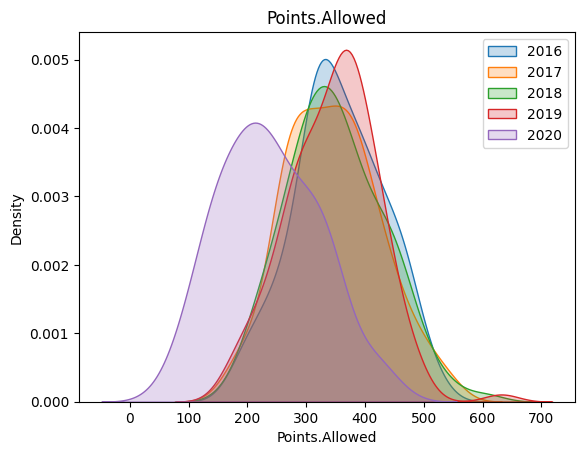

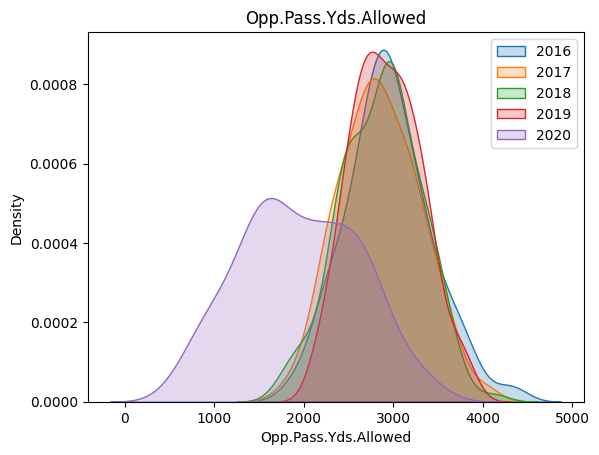

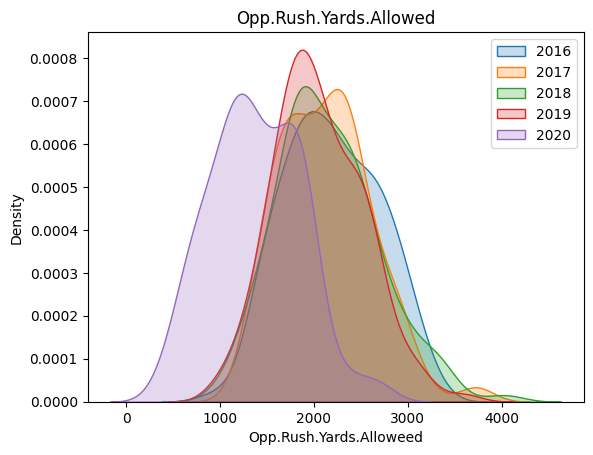

In [ ]:
# Create a few plots showing how each metric changed over time:
sns.kdeplot(df_2016['Points.Allowed'], label='2016', fill=True)
sns.kdeplot(df_2017['Points.Allowed'], label='2017', fill=True)
sns.kdeplot(df_2018['Points.Allowed'], label='2018', fill=True)
sns.kdeplot(df_2019['Points.Allowed'], label='2019', fill=True)
sns.kdeplot(df_2020['Points.Allowed'], label='2020', fill=True)
plt.title("Points.Allowed")
plt.legend()
plt.show()


sns.kdeplot(df_2016['Opp.Pass.Yds.Allowed'], label='2016', fill=True)
sns.kdeplot(df_2017['Opp.Pass.Yds.Allowed'], label='2017', fill=True)
sns.kdeplot(df_2018['Opp.Pass.Yds.Allowed'], label='2018', fill=True)
sns.kdeplot(df_2019['Opp.Pass.Yds.Allowed'], label='2019', fill=True)
sns.kdeplot(df_2020['Opp.Pass.Yds.Allowed'], label='2020', fill=True)
plt.title("Opp.Pass.Yds.Allowed")
plt.legend()
plt.show()

sns.kdeplot(df_2016['Opp.Rush.Yards.Alloweed'], label='2016', fill=True)
sns.kdeplot(df_2017['Opp.Rush.Yards.Alloweed'], label='2017', fill=True)
sns.kdeplot(df_2018['Opp.Rush.Yards.Alloweed'], label='2018', fill=True)
sns.kdeplot(df_2019['Opp.Rush.Yards.Alloweed'], label='2019', fill=True)
sns.kdeplot(df_2020['Opp.Rush.Yards.Alloweed'], label='2020', fill=True)
plt.title("Opp.Rush.Yards.Allowed")
plt.legend()
plt.show()

2020 was also weird for the defence where there was less than what was expected probably due to covid. Most the other data seems to follow a standard pattern except for the slight depreciation in 2019 when the scores were all a little smaller than expected.
